<a href="https://colab.research.google.com/github/edisonfabriciopm/Regresion-Lineal-/blob/main/Regresion_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importar las librerias  

In [22]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

#Esconde las advertencias
import warnings
warnings.filterwarnings('ignore')

In [23]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))



Creamos log/odds

In [24]:
x = np.linspace(-10, 10, 100)
x

array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
        -9.19191919,  -8.98989899,  -8.78787879,  -8.58585859,
        -8.38383838,  -8.18181818,  -7.97979798,  -7.77777778,
        -7.57575758,  -7.37373737,  -7.17171717,  -6.96969697,
        -6.76767677,  -6.56565657,  -6.36363636,  -6.16161616,
        -5.95959596,  -5.75757576,  -5.55555556,  -5.35353535,
        -5.15151515,  -4.94949495,  -4.74747475,  -4.54545455,
        -4.34343434,  -4.14141414,  -3.93939394,  -3.73737374,
        -3.53535354,  -3.33333333,  -3.13131313,  -2.92929293,
        -2.72727273,  -2.52525253,  -2.32323232,  -2.12121212,
        -1.91919192,  -1.71717172,  -1.51515152,  -1.31313131,
        -1.11111111,  -0.90909091,  -0.70707071,  -0.50505051,
        -0.3030303 ,  -0.1010101 ,   0.1010101 ,   0.3030303 ,
         0.50505051,   0.70707071,   0.90909091,   1.11111111,
         1.31313131,   1.51515152,   1.71717172,   1.91919192,
         2.12121212,   2.32323232,   2.52525253,   2.72

In [25]:
y = sigmoid(x)



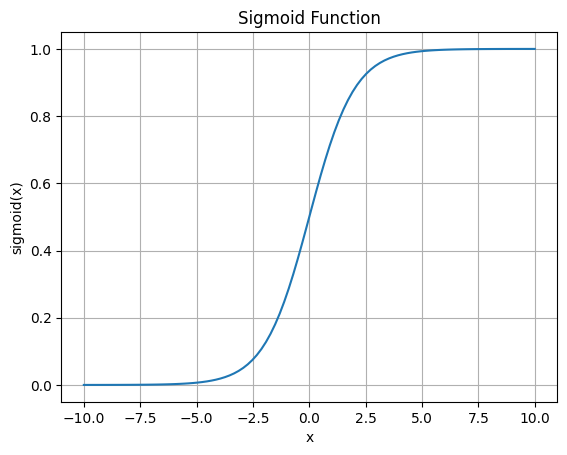

In [26]:
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.title('Sigmoid Function')
plt.grid(True)
plt.show()

Voy a predecir si un cliente realizar[a una compra basados en su edad y en su sueldo.

Vamos a clasificar al cliente como comprodaor o no comprador

Para ello debemos de definir una porbalidiad de umbral

In [27]:
#Create data
data = {'Age': [25, 30, 35, 40],
'Income': [50000, 60000, 70000, 80000],
'Purchased': [0, 0, 1, 1]}

data = pd.DataFrame(data)

data

,Age,Income,Purchased
0,25,50000,0
1,30,60000,0
2,35,70000,1
3,40,80000,1


In [28]:
#Define features and target variable
X = data[['Age', 'Income']]
y = data['Purchased']
print("imprimo las carateristiacas de los features")
print(X)
print("imprimo el target variable")
print(y)

imprimo las carateristiacas de los features
   Age  Income
0   25   50000
1   30   60000
2   35   70000
3   40   80000
imprimo el target variable
0    0
1    0
2    1
3    1
Name: Purchased, dtype: int64


In [29]:
#Fit logistic regression model
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [30]:
#Predict probability of purchase for new customers
new_customer = [[20, 50000]] # example new customer (age 25 & income 50000)
new_customer


[[20, 50000]]

In [31]:
#Get the probability that they will purchase (at index 1)
prob_purchase = model.predict_proba(new_customer)[:,1]
prob_purchase
print('Probability of purchase:', round(prob_purchase[0]))

Probability of purchase: 0


Evaluación del Modelo y Métricas de Rendimiento
Comencemos ahora a usar datos reales. Para la mayoría de los ejemplos siguientes, utilizaremos el conjunto de datos de cáncer de mama por su tamaño compacto y facilidad de uso.

Primero, comprendamos algunas métricas esenciales de aprendizaje automático que se utilizan para evaluar el rendimiento de un modelo. Estas métricas nos ayudan a determinar el rendimiento de nuestro modelo y pueden utilizarse para comparar diferentes modelos.

**Precisión**: Proporción de instancias correctamente clasificadas respecto al total de instancias.

**Precisión**: Proporción de instancias positivas verdaderas respecto a las instancias positivas previstas.

**Recuperación**: Proporción de instancias positivas verdaderas respecto a las instancias positivas reales.

**Puntuación F1**: Media armónica de la precisión y la recuperación, utilizada para equilibrar la compensación entre precisión y recuperación.

**Puntuación AUC ROC**: Área bajo la curva ROC (Receiver Operating Characteristic), que representa gráficamente la tasa de verdaderos positivos frente a la tasa de falsos positivos.

**Matriz de Confusión**: Tabla que resume el rendimiento de un modelo de clasificación comparando las etiquetas de clase previstas y reales. Calculemos la puntuación F1 y grafiquemos la matriz de confusión para un modelo de regresión logística utilizando el conjunto de datos de cáncer de mama.

In [33]:
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
#Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target
print ('Imprimo features o caracteristicas')
print (X)
print ('Imprimo label o etiqueta')
print (y)

Imprimo features o caracteristicas
[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
Imprimo label o etiqueta
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 

mi dataset tiene n ejmplos, con esos yo voy a entrenar a mi modelo.
Siempre voy a dividir mi dataa set
Minimo en dos particiones> particion de entrenamiento y l apartivi=cion de set

**Particion de entrenamiento**: 80 % del data set para entrenar> minbatch

**Particion de test**: 20% vamos a validar el modelo, es decir, esos son datos que el modelo nunca vio en el enternamiento. Para testear no exista sobreentrenamiento (que este generalizando bien)

In [34]:
#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train the logistic regression model
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)



LogisticRegression(max_iter=5000)

In [35]:
#Make predictions on the test set
y_pred = model.predict(X_test)
y_pred


array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0])

In [36]:
#Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")
print()



F1 Score: 0.9655172413793104



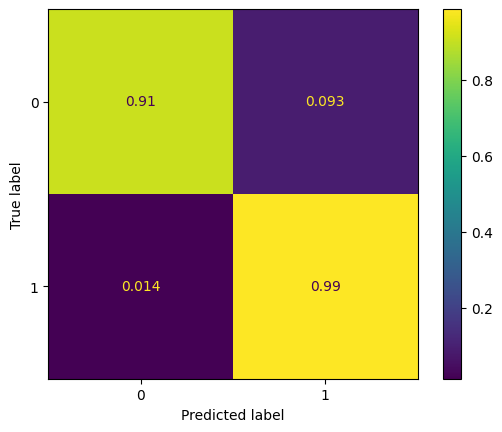

In [37]:
#Plot confusion matrix, normalize='true' to show percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

#Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

#Calculate precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")

#Calculate recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")

#Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC Score: {roc_auc}")

Accuracy: 0.956140350877193
Precision: 0.9459459459459459
Recall: 0.9859154929577465
ROC AUC Score: 0.9464461185718965


0,5-0,6 se considera deficiente

0,7-0,8 se considera decente

0,8-0,9 se considera bueno

0,9-1,0 se considera excelente